In [ ]:
import pandas as pd
import numpy as np
import scattertext as st

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize

import string

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
import nltk
from stop_words import get_stop_words

from nltk.tokenize.treebank import TreebankWordDetokenizer


In [ ]:
df = pd.read_csv('/Users/mohsenbahremani/Downloads/FullDataset.csv')

In [ ]:
df

,Unnamed: 0,title,text,source,label,title_text,type,newstitle,publish_date,content
0,0,ÒItÕs actually the safest time to fly.Ó,NaN,NaN,0,actually safest time fly thousands flights...,article,"""Photos of deserted, nearly empty airports aro...",2020-03-01T18:39:00Z,thousands of flights around the world have bee...
1,1,"""Strengthening accountability to end TB""",NaN,NaN,1,strengthening accountability end tb today re...,article,"""WHO offers national assessment checklist for ...",NaN,who today released a checklist to enable membe...
2,2,Lack of Paid Sick Leave a Coronavirus Threat,NaN,NaN,1,lack paid sick leave coronavirus threat edit...,article,"""Lack of Paid Sick Leave a Coronavirus Threat""",NaN,editor 's note for the latest updates on the 2...
3,3,States are imposing mandatory leave and statew...,NaN,NaN,0,states imposing mandatory leave statewise sc...,post,NaN,NaN,NaN
4,4,Guidance for Administrators in Parks and Recre...,NaN,NaN,1,guidance administrators parks recreational ...,article,"""Information for Laboratories about Coronaviru...",2/11/20,these sequences are intended to be used for th...
...,...,...,...,...,...,...,...,...,...,...
5078,5078,“The mainstream media pretended there was a de...,NaN,NaN,0,mainstream media pretended deadly surge c...,post,"""What the MSM Was Afraid to Tell You""",NaN,this week while the mainstream mainstream medi...
5079,5079,Repercussions From Antibiotics Overuse During ...,NaN,NaN,1,repercussions antibiotics overuse pandemic ...,article,"""Access denied | www.webmd.com used Cloudflare...",NaN,this website is using a security service to pr...
5080,5080,Study Confirms Cats Can Become Infected With a...,NaN,NaN,1,study confirms cats become infected may tra...,article,"""""",NaN,NaN
5081,5081,Texas Gov. Pauses Economic Reopening,NaN,NaN,1,texas gov pauses economic reopening website ...,article,"""Access denied | www.webmd.com used Cloudflare...",NaN,this website is using a security service to pr...


In [ ]:
df=df.drop_duplicates(subset=['title_text'])
df.shape

(4953, 10)

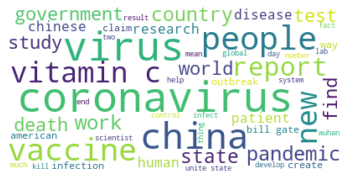

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#text = df.title_text[0]
text=['the']
for i in df.title_text[df.label==0]:
    text.append(i)
text = '\n'.join(text)
text=" ".join(text.split())

import matplotlib.pyplot as plt
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemma_word=[]
for w in words:
    word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
    word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
    word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
    lemma_word.append(word3)
    
# filter out stop words
from nltk.corpus import stopwords
import nltk
from stop_words import get_stop_words
stop_words = list(get_stop_words('en'))         #Have around 174 stopwords
nltk_words = list(stopwords.words('english'))   #Have around 179 stopwords
stop_words.extend(nltk_words)
new_words=('even','give','year','look','call',"good",'cause','need','time','already','case','come','know','may','one', 'go', 'take' , 'see', 'u','say','use','well', 'many','begin','first','make',"include","show")
for i in new_words:
    stop_words.append(i)
output = [w for w in lemma_word if w not in stop_words]


from nltk.tokenize.treebank import TreebankWordDetokenizer
text2=TreebankWordDetokenizer().detokenize(output)
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

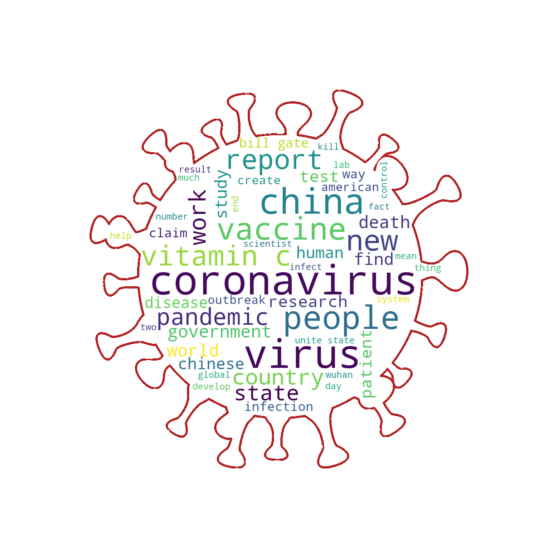

In [ ]:
from PIL import Image

mask = np.array(Image.open("/Users/mohsenbahremani/Downloads/corona.png"))
mask=mask[:,:,0]

def transform_format(val):
    if val != 0:
        return val
    else:
        return 255
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))    
wc = WordCloud(background_color="white", max_words=50, mask=transformed_mask,
                contour_width=3, contour_color='firebrick')


# Generate a wordcloud
wc.generate(text2)

# store to file
wc.to_file("/Users/mohsenbahremani/Downloads/Coronaa.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Scatter text

In [ ]:
df["pp"]=df["label"]

In [ ]:
j=0
for i in df["title_text"]:
    text = i
    # split into words
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]

    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_word=[]
    for w in words:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)

    # filter out stop words
    stop_words = list(get_stop_words('en'))         #Have around 174 stopwords
    nltk_words = list(stopwords.words('english'))   #Have around 179 stopwords
    stop_words.extend(nltk_words)
    new_words=('even','give','year','look','call',"good",'cause','need','time','already','case','come','know','may','one', 'go', 'take' , 'see', 'u','say','use','well', 'many','begin','first','make',"include","show")
    for t in new_words:
        stop_words.append(t)
    output = [w for w in lemma_word if w not in stop_words]
    text2=TreebankWordDetokenizer().detokenize(output)
    df.pp.iloc[j]=text2
    
    j+=1


In [ ]:

df.label[df.label==0]= "False"
df.label[df.label==1]= "True"

df=df.assign(
    parse=lambda df: df.title_text.apply(st.whitespace_nlp_with_sentences)
)

corpus = st.CorpusFromParsedDocuments(
    df, category_col='label', parsed_col='parse'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

In [ ]:
df

,Unnamed: 0,title,text,source,label,title_text,type,newstitle,publish_date,content,pp,parse
0,0,ÒItÕs actually the safest time to fly.Ó,NaN,NaN,False,actually safest time fly thousands flights...,article,"""Photos of deserted, nearly empty airports aro...",2020-03-01T18:39:00Z,thousands of flights around the world have bee...,actually safe fly thousand flight around world...,"(actually, safest, time, fly, thousands, fligh..."
1,1,"""Strengthening accountability to end TB""",NaN,NaN,True,strengthening accountability end tb today re...,article,"""WHO offers national assessment checklist for ...",NaN,who today released a checklist to enable membe...,strengthen accountability end tb today release...,"(strengthening, accountability, end, tb, today..."
2,2,Lack of Paid Sick Leave a Coronavirus Threat,NaN,NaN,True,lack paid sick leave coronavirus threat edit...,article,"""Lack of Paid Sick Leave a Coronavirus Threat""",NaN,editor 's note for the latest updates on the 2...,lack pay sick leave coronavirus threat editor ...,"(lack, paid, sick, leave, coronavirus, threat,..."
3,3,States are imposing mandatory leave and statew...,NaN,NaN,False,states imposing mandatory leave statewise sc...,post,NaN,NaN,NaN,state impose mandatory leave statewise school ...,"(states, imposing, mandatory, leave, statewise..."
4,4,Guidance for Administrators in Parks and Recre...,NaN,NaN,True,guidance administrators parks recreational ...,article,"""Information for Laboratories about Coronaviru...",2/11/20,these sequences are intended to be used for th...,guidance administrator park recreational facil...,"(guidance, administrators, parks, recreational..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,5078,“The mainstream media pretended there was a de...,NaN,NaN,False,mainstream media pretended deadly surge c...,post,"""What the MSM Was Afraid to Tell You""",NaN,this week while the mainstream mainstream medi...,mainstream medium pretend deadly surge covid t...,"(mainstream, media, pretended, deadly, surge, ..."
5079,5079,Repercussions From Antibiotics Overuse During ...,NaN,NaN,True,repercussions antibiotics overuse pandemic ...,article,"""Access denied | www.webmd.com used Cloudflare...",NaN,this website is using a security service to pr...,repercussion antibiotic overuse pandemic websi...,"(repercussions, antibiotics, overuse, pandemic..."
5080,5080,Study Confirms Cats Can Become Infected With a...,NaN,NaN,True,study confirms cats become infected may tra...,article,"""""",NaN,NaN,study confirm cat become infect transmit cat,"(study, confirms, cats, become, infected, may,..."
5081,5081,Texas Gov. Pauses Economic Reopening,NaN,NaN,True,texas gov pauses economic reopening website ...,article,"""Access denied | www.webmd.com used Cloudflare...",NaN,this website is using a security service to pr...,texas gov pause economic reopen website securi...,"(texas, gov, pauses, economic, reopening, webs..."


In [ ]:
html = st.produce_scattertext_explorer(
    corpus,
    category='False', category_name='False news', not_category_name='True news',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['type'],
    transform=st.Scalers.dense_rank
)
open('/Users/mohsenbahremani/Downloads/demo_compact.html', 'w').write(html)

5623065

##word Cloud for Real News

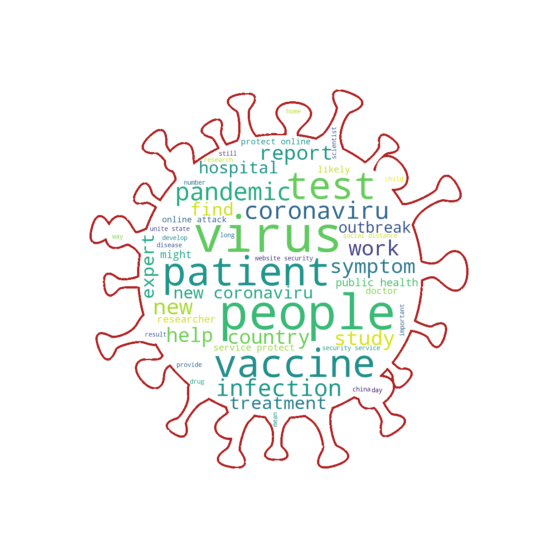

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#text = df.title_text[0]
text=['the']
for i in df.title_text[df.label==1]:
    text.append(i)
text = '\n'.join(text)
text=" ".join(text.split())

import matplotlib.pyplot as plt
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemma_word=[]
for w in words:
    word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
    word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
    word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
    lemma_word.append(word3)
    
# filter out stop words
from nltk.corpus import stopwords
import nltk
from stop_words import get_stop_words
stop_words = list(get_stop_words('en'))         #Have around 174 stopwords
nltk_words = list(stopwords.words('english'))   #Have around 179 stopwords
stop_words.extend(nltk_words)
new_words=('even','give','year','look','call',"good",'cause','need','time','already','case','come','know','may','one', 'go', 'take' , 'see', 'u','say','use','well', 'many','begin','first','make',"include","show")
for i in new_words:
    stop_words.append(i)
output = [w for w in lemma_word if w not in stop_words]


from nltk.tokenize.treebank import TreebankWordDetokenizer
text2=TreebankWordDetokenizer().detokenize(output)
from PIL import Image

mask = np.array(Image.open("/Users/mohsenbahremani/Downloads/corona.png"))
mask=mask[:,:,0]

def transform_format(val):
    if val != 0:
        return val
    else:
        return 255
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))    
wc = WordCloud(background_color="white", max_words=50, mask=transformed_mask,
                contour_width=3, contour_color='firebrick')


# Generate a wordcloud
wc.generate(text2)

# store to file
wc.to_file("/Users/mohsenbahremani/Downloads/Coronaaa.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()